In [1]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

In C:\Users\kaina\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\kaina\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\kaina\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\kaina\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\kaina\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [90]:
df = pd.read_csv('Without_Trx_2017_01_2020_09_monthly.csv')
def fun(row):
    return str(row['Year'])+'-' + str(row['Month'])
df['Date'] = df.apply(lambda x:fun(x),axis = 1)
df.Date = pd.to_datetime(df.Date)
df.sort_values(['Date'],inplace = True)

# Filter
1. Drugs don't have WAC until 2020-9 (4700 to 3322)

In [111]:
## Filter one
list_ = df[(df.Year == 2020) & (df.Month == 9)].NDC.unique()
df = df[df.NDC.isin(list_)]

In [112]:
def get_pct_month(id_,df):
    
        df1 = df[df.NDC == id_][['Date','WAC']]
        df1.columns = ['ds','y']
        date = max(df1.ds)
        prophet = Prophet(changepoint_prior_scale=0.15, daily_seasonality=False)
        prophet.fit(df1)
        build_forecast = prophet.make_future_dataframe(periods=12, freq='M')
        forecast = prophet.predict(build_forecast)
        forecast = forecast[forecast.ds>=date]
        forecast.reset_index(inplace = True)
        forecast['pct_change'] = forecast.yhat.pct_change()
        month_ = forecast.iloc[forecast['pct_change'].idxmax()].ds.month
        pct_ = forecast['pct_change'].max()
        return month_,pct_
   

In [113]:
pain_class = df[df['Major Class']=='PAIN']
dict_ = {}
for NDC in pain_class.NDC.unique():
    print(NDC)
    a,b = get_pct_month(NDC,pain_class)
    dict_[NDC] = [a,b]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


58468009003


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


58468009001


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


49234045


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


49233045


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


49234005


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


6026718


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


59011046010


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


59011046020


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


59011048010


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


59011044020


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


59011044010


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


59011048020


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


25153002


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


25152531


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


25152534


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


25152551


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


37200101


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


69437020301


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


63481002509


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


59011041020


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


59011041010


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


69437031601


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


59011042020


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


59011043010


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


59011043020


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


59011042010


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


59011041510


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


59011041520


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


173047800


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


173044902


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


63323048557


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


63323048527


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


173047900


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


173056200


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


50458084002


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


63323026929


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


173052400


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


173052300


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


63323049507


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


63323049227


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


63323049257


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


173073900


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


173073701


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


50458051360


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


50458065010


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


50458065060


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


50458065960


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


173073601


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


173073500


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


259160501


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


259161001


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


60793013601


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


12496075705


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


75987003004


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


75987003104


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


59676082001


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


597003001


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


597002901


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


10144059415


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


63481062370


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


42195030809


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


25141190


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


25142160


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


25141160


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


25152031


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


25151501


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


6380118


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


63481062970


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


63481068447


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


24510014010


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


24510013010


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


24510011010


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


24510011510


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


24510012010


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


63481062870


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


42023011510


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


63481062770


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


409161050


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


409156010


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


409125601


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


409125401


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


65224033060


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


64896069250


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


65224031560


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


65224031060


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


64896067250


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


65224035060


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


64896068251


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


64896069151


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


65224034060


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


64896067151


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


69323066


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


65224085009


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


64896068151


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


52244044910


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


6380101


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


42858012201


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


42858023401


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


42858033801


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


63323048217


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


70257056302


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


259162001


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


42023011410


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


87541030091


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


70257056301


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


42858041616


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


63323049237


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


63323049216


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


42858023450


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


55513084101


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


69794030401


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


63323048526


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


89122049663


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


69794020301


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


51759020410


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.


2143611


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


50458010205


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


2143601


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


2237711


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.


42195068810


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


55513084301


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


50458010405


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


50458010505


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


409125502


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


50458010605


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


50458010105


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.


2237701


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.


70515060215


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.


2311509


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


69344020429


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


69344020623


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


24510011660


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


24510005010


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


24510007510


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


24510005860


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


24510010010


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


69344020329


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


24510017460


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


24510023260


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


69344010233


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


69344010101
2311501


ValueError: Dataframe has less than 2 non-NaN rows.

In [114]:
dict_

{58468009003: [1, 0.06684859071808424],
 58468009001: [1, 0.06684859071808424],
 49234045: [1, 0.02212067046484867],
 49233045: [1, 0.02212067046484867],
 49234005: [1, 0.02212067046484867],
 6026718: [9, 0.0],
 59011046010: [1, 0.039970888212742306],
 59011046020: [1, 0.03948523384419844],
 59011048010: [1, 0.04140908502983076],
 59011044020: [1, 0.04102162603399795],
 59011044010: [1, 0.04085515754351743],
 59011048020: [1, 0.04376665339500807],
 25153002: [1, 0.037373497322246374],
 25152531: [1, 0.039605364095540274],
 25152534: [1, 0.039605364095540274],
 25152551: [1, 0.03932991548719933],
 37200101: [9, 0.0],
 69437020301: [9, 0.0],
 63481002509: [1, 0.09378163461344458],
 59011041020: [1, 0.04013895648039467],
 59011041010: [1, 0.04080853900482029],
 69437031601: [9, 0.0],
 59011042020: [1, 0.04141312688465648],
 59011043010: [1, 0.04052072445937127],
 59011043020: [1, 0.04101601879542982],
 59011042010: [1, 0.03988904267771742],
 59011041510: [1, 0.04022734327371591],
 5901104

In [117]:
## Percentage of drug will not change
i=0
for key in dict_.keys():
    if dict_[key][1]<0.01:
        i+=1
i/len(dict_)

0.3546099290780142

<AxesSubplot:>

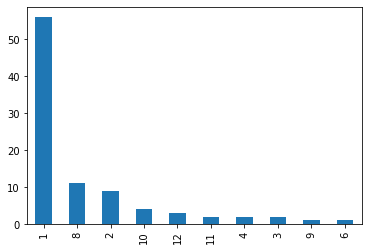

In [124]:
## Most LIKELY MONTH
list_ = []
for key in dict_.keys():
    if dict_[key][1]>0.01:
        list_.append(dict_[key][0])
pd.Series(list_).value_counts(sort=True).plot.bar()

In [137]:
## Top 20 percentage change
sorted(dict_.items(), key=lambda kv: kv[1][1],reverse = True)[:20]

[(409156010, [10, 2.624392110788234]),
 (63323048526, [3, 1.3291981025064454]),
 (87541030091, [4, 0.1592947084145513]),
 (63481062770, [1, 0.14591019115468118]),
 (50458084002, [1, 0.13172262412026603]),
 (24510011010, [1, 0.1249270384288741]),
 (24510012010, [1, 0.12486634262073215]),
 (24510011510, [1, 0.11843496216832006]),
 (24510013010, [1, 0.11836642131812569]),
 (65224034060, [1, 0.11260452843545465]),
 (65224031060, [1, 0.11257321386024266]),
 (65224031560, [1, 0.11222163805508978]),
 (65224035060, [1, 0.11219720740844208]),
 (24510014010, [1, 0.11187352730990585]),
 (55513084101, [1, 0.10237974419970142]),
 (65224085009, [10, 0.09944475531784525]),
 (52244044910, [1, 0.09400637825323233]),
 (63481002509, [1, 0.09378163461344458]),
 (42023011410, [2, 0.09265113450571394]),
 (63323049507, [11, 0.09065531130331195])]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


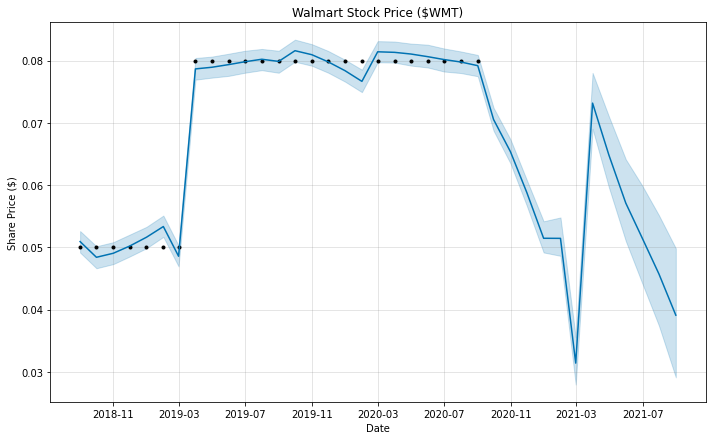

In [144]:
df1 = pain_class[pain_class.NDC == 63323048526][['Date','WAC']]
df1.columns = ['ds','y']
date = max(df1.ds)
prophet = Prophet(changepoint_prior_scale=0.15, daily_seasonality=False)
prophet.fit(df1)
build_forecast = prophet.make_future_dataframe(periods=12, freq='M')
forecast = prophet.predict(build_forecast)
# plot forecasts
prophet.plot(forecast, xlabel='Date', ylabel='Share Price ($)')
plt.title('Walmart Stock Price ($WMT)')
# display graph
plt.show()
forecast = forecast[forecast.ds>=date]
forecast.reset_index(inplace = True)
forecast['pct_change'] = forecast.yhat.pct_change()

In [147]:
dict_

{58468009003: [1, 0.06684859071808424],
 58468009001: [1, 0.06684859071808424],
 49234045: [1, 0.02212067046484867],
 49233045: [1, 0.02212067046484867],
 49234005: [1, 0.02212067046484867],
 6026718: [9, 0.0],
 59011046010: [1, 0.039970888212742306],
 59011046020: [1, 0.03948523384419844],
 59011048010: [1, 0.04140908502983076],
 59011044020: [1, 0.04102162603399795],
 59011044010: [1, 0.04085515754351743],
 59011048020: [1, 0.04376665339500807],
 25153002: [1, 0.037373497322246374],
 25152531: [1, 0.039605364095540274],
 25152534: [1, 0.039605364095540274],
 25152551: [1, 0.03932991548719933],
 37200101: [9, 0.0],
 69437020301: [9, 0.0],
 63481002509: [1, 0.09378163461344458],
 59011041020: [1, 0.04013895648039467],
 59011041010: [1, 0.04080853900482029],
 69437031601: [9, 0.0],
 59011042020: [1, 0.04141312688465648],
 59011043010: [1, 0.04052072445937127],
 59011043020: [1, 0.04101601879542982],
 59011042010: [1, 0.03988904267771742],
 59011041510: [1, 0.04022734327371591],
 5901104